## Task:- To analyse a portfolio of stocks to provide consultation on investment management based on client’s requirement.

### Preliminary Steps :- 
- Data loading
- Data Exploration
- Data Visualization

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_info_columns',500)

### Preparing data for Visualization

In [2]:
# load files as dataframe
sp500 = pd.read_csv("D:\Documents\capstone project\Dataset\S&P500.csv")
sp500['Ticker'] = 'SP500'

aal = pd.read_csv("D:\Documents\capstone project\Dataset\Aviation\AAL.csv")
aal['Ticker'] = 'AAL'

algt = pd.read_csv("D:\Documents\capstone project\Dataset\Aviation\ALGT.csv")
algt['Ticker'] = 'ALGT'

alk = pd.read_csv("D:\Documents\capstone project\Dataset\Aviation\ALK.csv")
alk['Ticker'] = 'ALK'

dal = pd.read_csv("D:\Documents\capstone project\Dataset\Aviation\DAL.csv")
dal['Ticker'] = 'DAL'

ha = pd.read_csv("D:\Documents\capstone project\Dataset\Aviation\HA.csv")
ha['Ticker'] = 'HA'

luv = pd.read_csv("D:\Documents\capstone project\Dataset\Aviation\LUV.csv")
luv['Ticker'] = 'LUV'

bcs = pd.read_csv("D:\Documents\capstone project\Dataset\Finance\BCS.csv")
bcs['Ticker'] = 'BCS'

cs = pd.read_csv("D:\Documents\capstone project\Dataset\Finance\CS.csv")
cs['Ticker'] = 'CS'

db = pd.read_csv("D:\Documents\capstone project\Dataset\Finance\DB.csv")
db['Ticker'] = 'DB'

gs = pd.read_csv("D:\Documents\capstone project\Dataset\Finance\GS.csv")
gs['Ticker'] = 'GS'

ms = pd.read_csv("D:\Documents\capstone project\Dataset\Finance\MS.csv")
ms['Ticker'] = 'MS'

wfc = pd.read_csv("D:\Documents\capstone project\Dataset\Finance\WFC.csv")
wfc['Ticker'] = 'WFC'

bhc = pd.read_csv("D:\Documents\capstone project\Dataset\Pharma_Healthcare\BHC.csv")
bhc['Ticker'] = 'BHC'

jnj = pd.read_csv("D:\Documents\capstone project\Dataset\Pharma_Healthcare\JNJ.csv")
jnj['Ticker'] = 'JNJ'

mrk = pd.read_csv("D:\Documents\capstone project\Dataset\Pharma_Healthcare\MRK.csv")
mrk['Ticker'] = 'MRK'

pfe = pd.read_csv("D:\Documents\capstone project\Dataset\Pharma_Healthcare\PFE.csv")
pfe['Ticker'] = 'PFE'

rhhby = pd.read_csv("D:\Documents\capstone project\Dataset\Pharma_Healthcare\RHHBY.csv")
rhhby['Ticker'] = 'RHHBY'

unh = pd.read_csv("D:/Documents/capstone project/Dataset/Pharma_Healthcare/UNH.csv")
unh['Ticker'] = 'UNH'

aapl = pd.read_csv("D:/Documents/capstone project/Dataset/Technology/AAPL.csv")
aapl['Ticker'] = 'AAPL'

amzn = pd.read_csv("D:/Documents/capstone project/Dataset/Technology/AMZN.csv")
amzn['Ticker'] = 'AMZN'

fb = pd.read_csv("D:/Documents/capstone project/Dataset/Technology/FB.csv")
fb['Ticker'] = 'FB'

goog = pd.read_csv("D:/Documents/capstone project/Dataset/Technology/GOOG.csv")
goog['Ticker'] = 'GOOG'

ibm = pd.read_csv("D:/Documents/capstone project/Dataset/Technology/IBM.csv")
ibm['Ticker'] = 'IBM'

msft = pd.read_csv("D:/Documents/capstone project/Dataset/Technology/MSFT.csv")
msft['Ticker'] = 'MSFT'

# concat all dataframes to a single df(stock)
all_df = [sp500,aal,algt,alk,dal,ha,luv,bcs,cs,db,gs,ms,wfc,bhc,jnj,mrk,pfe,rhhby,unh,aapl,amzn,fb,goog,ibm,msft]
stock = pd.concat(all_df)

# dropping rows with missing values
stock=stock.dropna()

In [3]:
# checking missing values in df
round(100*(stock.isnull().sum()/len(stock)), 2)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
Ticker       0.0
dtype: float64

In [4]:
# setting Date column to datetime format
stock[['Day','Month','Year']] = stock.Date.str.split("-",expand=True,)
stock['Date'] = stock[['Year', 'Day','Month']].agg(''.join, axis=1)
stock['Date'] = pd.to_datetime(stock['Date'], format='%Y%d%m')

In [5]:
# selecting last five years data as df to work with
stock = stock.loc[(stock['Date'] >= '2015-10-01')]

# Set stock df's index column to Date
stock=stock.set_index('Date')

In [6]:
# Creating df(aal) with index as date and Stock Close Price as column 
aal = stock.loc[stock['Ticker'] == 'AAL'][['Close']]
# Changing close price column name to that of its Ticker
aal.columns = ['AAL']

# Creating df(algt) with index as date and Stock Close Price as column
algt = stock.loc[stock['Ticker'] == 'ALGT'][['Close']]
# Changing close price column name to that of its Ticker
algt.columns = ['ALGT']

# Creating df(alk) with index as date and Stock Close Price as column
alk = stock.loc[stock['Ticker'] == 'ALK'][['Close']]
# Changing close price column name to that of its Ticker
alk.columns = ['ALK']

# Creating df(dal) with index as date and Stock Close Price as column
dal = stock.loc[stock['Ticker'] == 'DAL'][['Close']]
# Changing close price column name to that of its Ticker
dal.columns = ['DAL']

# Creating df(ha) with index as date and Stock Close Price as column
ha = stock.loc[stock['Ticker'] == 'HA'][['Close']]
# Changing close price column name to that of its Ticker
ha.columns = ['HA']

# Creating df(luv) with index as date and Stock Close Price as column
luv = stock.loc[stock['Ticker'] == 'LUV'][['Close']]
# Changing close price column name to that of its Ticker
luv.columns = ['LUV']

# Creating df(bcs) with index as date and Stock Close Price as column
bcs = stock.loc[stock['Ticker'] == 'BCS'][['Close']]
# Changing close price column name to that of its Ticker
bcs.columns = ['BCS']

# Creating df(cs) with index as date and Stock Close Price as column
cs = stock.loc[stock['Ticker'] == 'CS'][['Close']]
# Changing close price column name to that of its Ticker
cs.columns = ['CS']

# Creating df(db) with index as date and Stock Close Price as column
db = stock.loc[stock['Ticker'] == 'DB'][['Close']]
# Changing close price column name to that of its Ticker
db.columns = ['DB']

# Creating df(gs) with index as date and Stock Close Price as column
gs = stock.loc[stock['Ticker'] == 'GS'][['Close']]
# Changing close price column name to that of its Ticker
gs.columns = ['GS']

# Creating df(ms) with index as date and Stock Close Price as column
ms = stock.loc[stock['Ticker'] == 'MS'][['Close']]
# Changing close price column name to that of its Ticker
ms.columns = ['MS']

# Creating df(wfc) with index as date and Stock Close Price as column
wfc = stock.loc[stock['Ticker'] == 'WFC'][['Close']]
# Changing close price column name to that of its Ticker
wfc.columns = ['WFC']

# Creating df(bhc) with index as date and Stock Close Price as column
bhc = stock.loc[stock['Ticker'] == 'BHC'][['Close']]
# Changing close price column name to that of its Ticker
bhc.columns = ['BHC']

# Creating df(jnj) with index as date and Stock Close Price as column
jnj = stock.loc[stock['Ticker'] == 'JNJ'][['Close']]
# Changing close price column name to that of its Ticker
jnj.columns = ['JNJ']

# Creating df(mrk) with index as date and Stock Close Price as column
mrk = stock.loc[stock['Ticker'] == 'MRK'][['Close']]
# Changing close price column name to that of its Ticker
mrk.columns = ['MRK']

# Creating df(pfe) with index as date and Stock Close Price as column
pfe = stock.loc[stock['Ticker'] == 'PFE'][['Close']]
# Changing close price column name to that of its Ticker
pfe.columns = ['PFE']

# Creating df(rhhby) with index as date and Stock Close Price as column
rhhby = stock.loc[stock['Ticker'] == 'RHHBY'][['Close']]
# Changing close price column name to that of its Ticker
rhhby.columns = ['RHHBY']

# Creating df(unh) with index as date and Stock Close Price as column
unh = stock.loc[stock['Ticker'] == 'UNH'][['Close']]
# Changing close price column name to that of its Ticker
unh.columns = ['UNH']

# Creating df(aapl) with index as date and Stock Close Price as column
aapl = stock.loc[stock['Ticker'] == 'AAPL'][['Close']]
# Changing close price column name to that of its Ticker
aapl.columns = ['AAPL']

# Creating df(amzn) with index as date and Stock Close Price as column
amzn = stock.loc[stock['Ticker'] == 'AMZN'][['Close']]
# Changing close price column name to that of its Ticker
amzn.columns = ['AMZN']

# Creating df(fb) with index as date and Stock Close Price as column
fb = stock.loc[stock['Ticker'] == 'FB'][['Close']]
# Changing close price column name to that of its Ticker
fb.columns = ['FB']

# Creating df(goog) with index as date and Stock Close Price as column
goog = stock.loc[stock['Ticker'] == 'GOOG'][['Close']]
# Changing close price column name to that of its Ticker
goog.columns = ['GOOG']

# Creating df(ibm) with index as date and Stock Close Price as column
ibm = stock.loc[stock['Ticker'] == 'IBM'][['Close']]
# Changing close price column name to that of its Ticker
ibm.columns = ['IBM']

# Creating df(msft) with index as date and Stock Close Price as column
msft = stock.loc[stock['Ticker'] == 'MSFT'][['Close']]
# Changing close price column name to that of its Ticker
msft.columns = ['MSFT']

# Creating df(sp500) with index as date and Stock Close Price as column
sp500 = stock.loc[stock['Ticker'] == 'SP500'][['Close']]
# Changing close price column name to that of its Ticker
sp500.columns = ['SP500']

# Creating single dataframe with column as Tickers and rows as stock close price and index as date
cp_df1 = pd.concat([aal,algt,alk,dal,ha,luv,bcs,cs,db,gs,ms,wfc,bhc,jnj,mrk,pfe,rhhby,unh,aapl,amzn,fb,goog,ibm,msft,sp500], axis=1)

In [7]:
# Normalized close Price
nor_prize=cp_df1.copy()
nor_prize=nor_prize[['AAL','AAPL','ALGT','ALK','DAL','HA','LUV','BCS','CS','DB','GS','MS',
           'WFC','BHC','JNJ','MRK','PFE','RHHBY','UNH','AMZN','FB','GOOG','IBM','MSFT','SP500']]/nor_prize.loc['2015-10-01']

In [8]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [10]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [11]:
init_notebook_mode(connected=True)
cf.go_offline()

### Visualizing stock prices

In [12]:
# Visualizing stock price with and without normalization

# Stock Close Prices before normalization
cp_df1.iplot(title = 'Stock Close Prices')

# Stock Close Prices after normalization
nor_prize.iplot(title = 'Stock Normalized Close Prices')

### Visualizing Returns

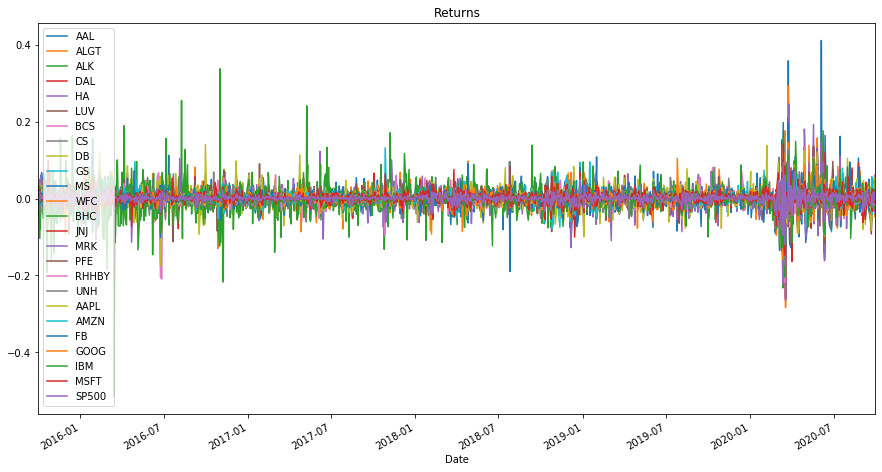

In [13]:
return_stocks = cp_df1.copy()
return_stocks = return_stocks.pct_change()
return_stocks = return_stocks.dropna(axis=0)
return_stocks.plot(title='Returns',figsize=(15,8))

In [14]:
# Average daily return from each stock in percentage
mdr = round((return_stocks.mean()*100),2)
mdr = pd.DataFrame(mdr)
mdr.columns = ['Avg Daily Return']

# Annualized Return in percentage
annul_return = round((return_stocks.mean()*100*252),2) # 252 because there are 252 trading windows annually
annul_return = pd.DataFrame(annul_return)
annul_return.columns = ['Annual Return']

# Visualization through plot
mdr.iplot(kind='bar',title='Percentage Mean Daily Return')
annul_return.iplot(kind='bar',title='Percentage Annually Return')

In [15]:
# Cumulative Return in percentage
cumul_ret = cp_df1.copy()
cumul_ret = round(((((cumul_ret.loc['2020-09-30'])/(cumul_ret.loc['2015-10-01']))-1)*100),2)
cumul_ret = pd.DataFrame(cumul_ret)
cumul_ret.columns = ['Cumulative Return']
cumul_ret.iplot(title='Cumulative Return')

### Visualizing Risks

In [16]:
# Risk Metric of each stock in percentage
stock_risk = round((return_stocks.std()*100),2)
risk_metric = pd.DataFrame(stock_risk)
risk_metric.columns = ['Risk Metric']

# Annualized Risk in percentage
import math 
annual_risk = round((math.sqrt(252)*stock_risk),2)
annual_risk = pd.DataFrame(annual_risk)
annual_risk.columns = ['Annual Risk']

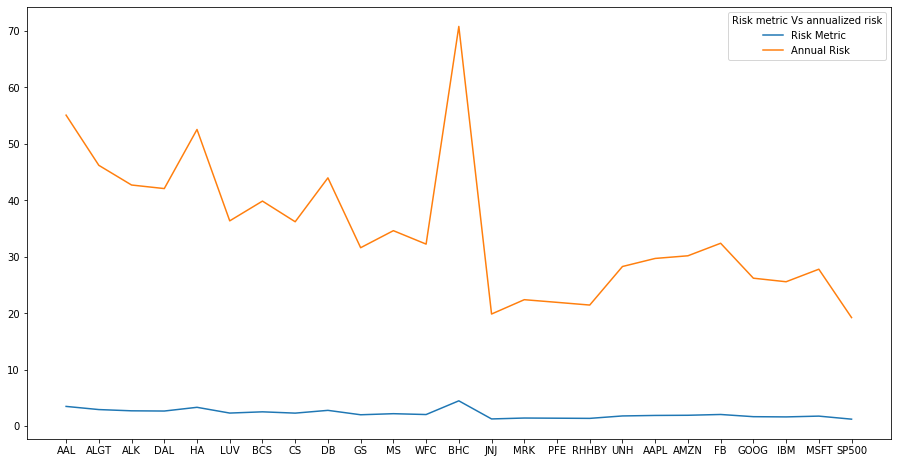

In [17]:
# Visualizing Risk metric and annualized risk
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.plot(risk_metric,label='Risk Metric')
ax.plot(annual_risk,label='Annual Risk')

ax.legend(title='Risk metric Vs annualized risk')

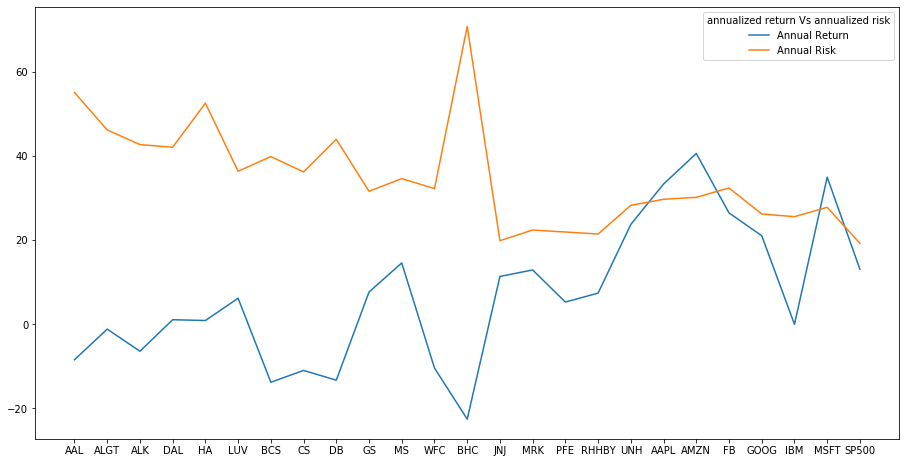

In [18]:
# Visualizing annualized return and annualized risk in percentage
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.plot(annul_return,label='Annual Return')
ax.plot(annual_risk,label='Annual Risk')

ax.legend(title='annualized return Vs annualized risk')